In [182]:
import pickle

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [141]:
loads = pd.read_pickle('/home/vladvin/Downloads/pred_18-19_852.pkl')
loads = loads[~loads['Predicted'].isna()].reset_index()
loads['park_id'] = 2
loads = loads.iloc[:-6]

In [142]:
loads.to_pickle('/home/vladvin/Downloads/pred_18-19_852_proc.pkl')

In [143]:
!cp /home/vladvin/Downloads/pred_18-19_852_proc.pkl ../data/

In [140]:
loads = pd.read_pickle('/home/vladvin/Downloads/pred_18-19_34361.pkl')
loads = loads[~loads['Predicted'].isna()].reset_index()
loads['park_id'] = 1

In [94]:
loads.to_pickle('/home/vladvin/Downloads/pred_18-19_34361_proc.pkl')

In [109]:
!cp /home/vladvin/Downloads/pred_18-19_34361_proc.pkl ../data/

In [165]:
loads = [
    pd.read_pickle('/home/vladvin/Downloads/pred_18-19_34361_proc.pkl'),
    pd.read_pickle('/home/vladvin/Downloads/pred_18-19_852_proc.pkl')
]
loads[1].drop(['marathon', 'max_temp'], axis=1, inplace=True)
loads = pd.concat(loads)

In [166]:
loads.shape

(1278, 7)

In [167]:
loads.head()

Date  Real  temp  prec  snow   Predicted  park_id
0 2018-01-02  1198  -6.1   0.9  81.0  666.890694        1
1 2018-01-03   823  -7.0   3.4  80.0  645.840774        1
2 2018-01-04   687 -10.7   0.1  82.0  650.895123        1
3 2018-01-05   616 -12.7   3.5  81.0  586.968432        1
4 2018-01-06   378  -8.5   7.2  86.0  157.477568        1

In [168]:
loads.to_pickle('../data/all.pkl')

In [169]:
ts_start = loads.iloc[0]['Date'].value // 10**6
ts_end = loads.iloc[100]['Date'].value // 10**6
print(ts_start, ts_end)

1514851200000 1523491200000


In [170]:
start_date = pd.datetime.fromtimestamp(ts_start // 10**3).replace(hour=0, minute=0, second=0)
end_date = pd.datetime.fromtimestamp(ts_end // 10**3).replace(hour=0, minute=0, second=0)

In [171]:
start_date

datetime.datetime(2018, 1, 2, 0, 0)

In [172]:
loads.head()

Date  Real  temp  prec  snow   Predicted  park_id
0 2018-01-02  1198  -6.1   0.9  81.0  666.890694        1
1 2018-01-03   823  -7.0   3.4  80.0  645.840774        1
2 2018-01-04   687 -10.7   0.1  82.0  650.895123        1
3 2018-01-05   616 -12.7   3.5  81.0  586.968432        1
4 2018-01-06   378  -8.5   7.2  86.0  157.477568        1

In [175]:
park_id = 2

In [176]:
selected = loads[loads['Date'].isin(pd.date_range(start_date, end_date, freq='D'))]
selected = selected[selected['park_id'] == park_id]
full_info = {
    'attendance_real': selected['Real'].tolist(),
    'attendance_pred': selected['Predicted'].astype(int).tolist(),
    'temperature': selected['temp'].tolist(),
    'snow': selected['snow'].tolist(),
    'prec': selected['prec'].tolist()
}
print(full_info)

{'attendance_real': [65, 88, 88, 60, 138, 361, 41, 66, 43, 18, 78, 251, 278, 15, 29, 22, 17, 104, 202, 191, 21, 25, 33, 75, 41, 145, 120, 14, 17, 37, 27, 32, 178, 207, 19, 19, 78, 18, 43, 140, 138, 20, 15, 21, 17, 43, 131, 143, 46, 70, 38, 49, 36, 118, 76, 16, 12, 7, 27, 40, 122, 124, 16, 34, 40, 22, 11, 130, 260, 20, 127, 51, 44, 107, 238, 200, 17, 31, 51, 50, 46, 197, 146, 48, 65, 40, 66, 343, 337, 221, 35, 51, 45, 22, 18, 240, 158, 33, 50, 74, 82], 'attendance_pred': [83, 81, 21, 38, 430, 326, 60, 81, 66, 60, 77, 287, 309, 41, 56, 10, 0, 28, 250, 269, 0, 0, 0, 3, 49, 264, 287, 25, 34, 27, 0, 26, 253, 287, 8, 14, 18, 19, 36, 258, 283, 0, 42, 49, 38, 53, 282, 309, 52, 64, 61, 67, 74, 307, 321, 58, 83, 78, 76, 90, 313, 338, 59, 83, 75, 39, 62, 283, 310, 0, 19, 48, 47, 56, 278, 302, 0, 27, 23, 11, 28, 252, 277, 18, 28, 16, 24, 273, 266, 313, 346, 31, 7, 23, 51, 297, 329, 23, 87, 89, 92], 'temperature': [3.3, 2.6, 1.8, 3.4, 1.3, -2.3, -1.7, -0.9, -3.3, -4.2, -4.0, -2.9, -3.8, -7.1, -6.7,

In [239]:
loads = pd.read_pickle('../data/all.pkl')

In [240]:
loads.shape

(1278, 7)

In [241]:
loads.head()

Date  Real  temp  prec  snow   Predicted  park_id
0 2018-01-02  1198  -6.1   0.9  81.0  666.890694        1
1 2018-01-03   823  -7.0   3.4  80.0  645.840774        1
2 2018-01-04   687 -10.7   0.1  82.0  650.895123        1
3 2018-01-05   616 -12.7   3.5  81.0  586.968432        1
4 2018-01-06   378  -8.5   7.2  86.0  157.477568        1

In [311]:
park1 = loads[loads['park_id'] == 2]

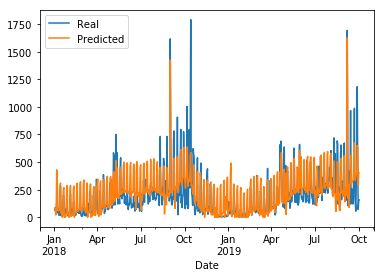

In [312]:
park1[['Date', 'Real', 'Predicted']].plot(x='Date')

In [275]:
median = np.median(park1['Predicted'])
max_val = np.max(park1['Predicted'])

In [276]:
median, max_val

(300.0036191014924, 5080.407812394377)

In [314]:
ts_start = park1.iloc[0]['Date'].value // 10**9
ts_end = park1.iloc[-1]['Date'].value // 10**9

<Figure size 1080x720 with 0 Axes>

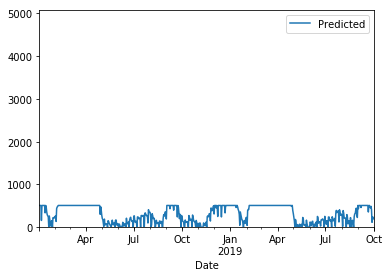

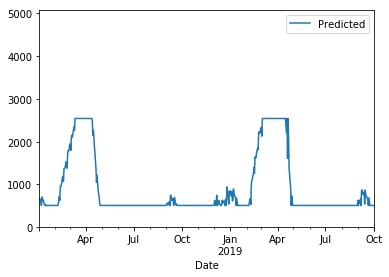

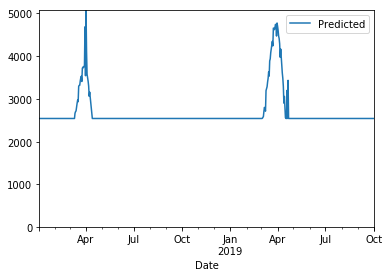

In [278]:
ts = [0.1, 0.5]

fig = plt.figure(figsize=(15, 10))

low = park1.copy()
middle = park1.copy()
high = park1.copy()
# cond = low['Predicted'] > 0.33 * max_val
# low.loc[cond, low.columns.get_loc('Predicted')] = 0
low['Predicted'] = low['Predicted'].clip_upper(ts[0] * max_val)
low[['Date', 'Predicted']].plot(x='Date', xlim=[pd.datetime.fromtimestamp(ts_start), pd.datetime.fromtimestamp(ts_end)], ylim=[0., max_val])

middle['Predicted'] = middle['Predicted'].clip_upper(ts[1] * max_val).clip_lower(ts[0] * max_val)
middle[['Date', 'Predicted']].plot(x='Date', xlim=[pd.datetime.fromtimestamp(ts_start), pd.datetime.fromtimestamp(ts_end)], ylim=[0., max_val])

high['Predicted'] = high['Predicted'].clip_lower(ts[1] * max_val)
high[['Date', 'Predicted']].plot(x='Date', xlim=[pd.datetime.fromtimestamp(ts_start), pd.datetime.fromtimestamp(ts_end)], ylim=[0., max_val])

In [354]:
ts_start = loads.iloc[1050]['Date'].value // 10**6
ts_end = loads.iloc[1200]['Date'].value // 10**6
print(ts_start, ts_end)

start_date = pd.datetime.fromtimestamp(ts_start // 10 ** 3).replace(hour=0, minute=0, second=0)
end_date = pd.datetime.fromtimestamp(ts_end // 10 ** 3).replace(hour=0, minute=0, second=0)

selected = loads[loads['Date'].isin(pd.date_range(start_date, end_date, freq='D'))]

1550361600000 1563321600000


In [365]:
loads.iloc[1200]['Date']

Timestamp('2019-07-17 00:00:00')

In [357]:
selected.shape

(302, 7)

In [358]:
max_vals = {
    1: np.max(loads[loads['park_id'] == 1]['Predicted']),
    2: np.max(loads[loads['park_id'] == 2]['Predicted']),
}

In [359]:
max_counts = selected.groupby('park_id')['Predicted'].max()
park_ids, counts = max_counts.index, max_counts.values
for i, park_id in enumerate(park_ids):
    counts[i] = counts[i] / max_vals[park_id]

In [360]:
park_counts = list(zip(park_ids, counts))

In [361]:
park_counts

[(1, 0.9390854797789813), (2, 0.3718557427659611)]

In [362]:
from operator import itemgetter

In [363]:
less_pop = sorted(park_counts, key=itemgetter(1))
print(less_pop)

[(2, 0.3718557427659611), (1, 0.9390854797789813)]


In [364]:
recommendations = {
    'loads': {},
    'recommended': []
}
for park_id, pop_num in less_pop:
    if pop_num > ts[1]:
        pop_index = 2
    elif (pop_num > ts[0]) and (pop_num <= ts[1]):
        pop_index = 1
    else:
        pop_index = 0
    
    recommendations['loads'][park_id] = pop_index
    recommendations['recommended'].append(park_id)
    
print(recommendations)

{'loads': {2: 1, 1: 2}, 'recommended': [2, 1]}
